<a href="https://colab.research.google.com/github/JulieOnIsland/DeepLearningforAI_class_2022/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zindi competition

**Order**
* Preprocessing and visualizing the data
* Construct the model (w/ transfer learning)
    1. VGG16 (Baseline)
    - Feature extraction
    - Fine tuning
    2. Resnet50
    - Feature extraction
    - Fine tuning
    3. Efficientnet
    - Feature extraction
    - Fine tuning

Final model that we chose is EfficientnetB2 fine-tuning version. And
its accuracy score is 0.995.

## Prepare the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dpath = '/content/drive/MyDrive/data/zindi_crop/'

In [ ]:
df_train = pd.read_csv(dpath+'Train.csv')
df_train.head()

,Image_id,Label
0,id_02amazy34fgh2.jpg,1
1,id_02mh3w48pmyc9.jpg,0
2,id_02rpb463h9d3w.jpg,0
3,id_02wc3jeeao8ol.jpg,1
4,id_03t2hapb8wz8p.jpg,1


In [ ]:
train_data = df_train['Image_id'].tolist()
train_data[:5]

['id_02amazy34fgh2.jpg',
 'id_02mh3w48pmyc9.jpg',
 'id_02rpb463h9d3w.jpg',
 'id_02wc3jeeao8ol.jpg',
 'id_03t2hapb8wz8p.jpg']

In [ ]:
train_healthy_data=df_train[df_train['Label']==0]
print(len(train_healthy_data))
train_healthy_data = train_healthy_data['Image_id'].tolist()
print(train_healthy_data[:5])

train_pest_data=df_train[df_train['Label']==1]
train_pest_data.head()
print(len(train_pest_data))
train_pest_data = train_pest_data['Image_id'].tolist()
print(train_pest_data[:5])

810
['id_02mh3w48pmyc9.jpg', 'id_02rpb463h9d3w.jpg', 'id_04xrxyd43rlgz.jpg', 'id_082w0qygo3eth.jpg', 'id_09v3am3ppzesz.jpg']
809
['id_02amazy34fgh2.jpg', 'id_02wc3jeeao8ol.jpg', 'id_03t2hapb8wz8p.jpg', 'id_05gqx7h8y6iye.jpg', 'id_06le9g89kqth5.jpg']


In [ ]:
df_test = pd.read_csv(dpath + 'Test.csv')
df_test.head()

,Image_id
0,id_00exusbkgzw1b.jpg
1,id_03dqinf6w0znv.jpg
2,id_046yl0cxn3ybz.jpg
3,id_04athdtx2abyg.jpg
4,id_062aauf9e9jk0.jpg


In [ ]:
test_data_list = df_test['Image_id'].to_list()
test_data_list[:5]

['id_00exusbkgzw1b.jpg',
 'id_03dqinf6w0znv.jpg',
 'id_046yl0cxn3ybz.jpg',
 'id_04athdtx2abyg.jpg',
 'id_062aauf9e9jk0.jpg']

Label=1 (pest)
Image shape: (1024, 498, 3)


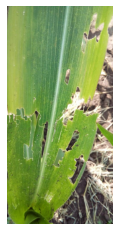

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '/content/drive/MyDrive/data/zindi_crop/Images/'
ex = image_path + train_data[3]
img=mpimg.imread(ex)
plt.imshow(img)
plt.axis('off')
print('Label=1 (pest)')
print(f"Image shape: {img.shape}")

Label=0 (healthy)
Image shape: (1024, 768, 3)


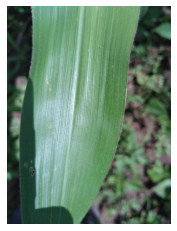

In [ ]:
ex2 = image_path + train_data[1]
img=mpimg.imread(ex2)
plt.imshow(img)
plt.axis('off')
print('Label=0 (healthy)')
print(f"Image shape: {img.shape}")

In [ ]:
import os, shutil, pathlib

# train, validation, and test dataset
original_dir = pathlib.Path(image_path)
new_base_dir = pathlib.Path("healthy_pest")
train_dir = new_base_dir / 'train'
val_dir = new_base_dir / 'val'
test_dir = new_base_dir / 'test'

train_healthy_dir = train_dir / 'healthy'
os.makedirs(train_healthy_dir)

train_pest_dir = train_dir / 'pest'
os.makedirs(train_pest_dir)

val_healthy_dir = val_dir / 'healthy'
os.makedirs(val_healthy_dir)

val_pest_dir = val_dir / 'pest'
os.makedirs(val_pest_dir)

test_healthy_dir = test_dir / 'healthy'
os.makedirs(test_healthy_dir)

test_pest_dir = test_dir / 'pest'
os.makedirs(test_pest_dir)


for i in train_healthy_data[:610]:
    shutil.copyfile(src=original_dir / i,
                    dst=train_healthy_dir / i)

for i in train_healthy_data[610:710]:
    shutil.copyfile(src=original_dir / i,
                    dst=val_healthy_dir / i)
    
for i in train_healthy_data[710:]:
    shutil.copyfile(src=original_dir / i,
                    dst=test_healthy_dir / i)
    
for i in train_pest_data[:609]:
    shutil.copyfile(src=original_dir / i,
                    dst=train_pest_dir / i)
    
for i in train_pest_data[609:709]:
    shutil.copyfile(src=original_dir / i,
                    dst=val_pest_dir / i)
    
for i in train_pest_data[709:]:
    shutil.copyfile(src=original_dir / i,
                    dst=test_pest_dir / i)

In [ ]:
for dirpath, dirnames, filenames in os.walk("healthy_pest"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'healthy_pest'.
There are 2 directories and 0 images in 'healthy_pest/train'.
There are 0 directories and 610 images in 'healthy_pest/train/healthy'.
There are 0 directories and 609 images in 'healthy_pest/train/pest'.
There are 2 directories and 0 images in 'healthy_pest/val'.
There are 0 directories and 100 images in 'healthy_pest/val/healthy'.
There are 0 directories and 100 images in 'healthy_pest/val/pest'.
There are 2 directories and 0 images in 'healthy_pest/test'.
There are 0 directories and 100 images in 'healthy_pest/test/healthy'.
There are 0 directories and 100 images in 'healthy_pest/test/pest'.


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

IMG_SIZE = (224, 224)

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    label_mode="binary", 
    batch_size=32
)

val_dataset = image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    label_mode="binary", 
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    label_mode="binary", 
    batch_size=32
)

Found 1219 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [ ]:
# Define plot_history function
def plot_history(history):
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

## VGG (Baseline)

### Feature extraction with data augmentation

In [ ]:
# Instantiating and freezing the VGG16 convolutional base
import tensorflow as tf
from tensorflow import keras

conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
conv_base.trainable=False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Printing the list of trainable weights before and after freezing
conv_base.trainable = True
print('This is the number of trainable weights before freezing the conv base:\n',
      len(conv_base.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:\n',
      len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base:
 26
This is the number of trainable weights after freezing the conv base:
 0


In [ ]:
# Adding a data augmentation stage and a classifier to the convolutional base
from tensorflow.keras import layers
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

In [ ]:
# Building the model
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_vgg = keras.Model(inputs, outputs)
model_vgg.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                             

In [ ]:
callbacks=[
    keras.callbacks.ModelCheckpoint(
        filepath='vgg_feature_extraction.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

In [ ]:
# Fit the model
history_vgg = model_vgg.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/10
39/39 [==============================] - 26s 261ms/step - loss: 6.8401 - accuracy: 0.9081 - val_loss: 10.4278 - val_accuracy: 0.9400
Epoch 2/10
39/39 [==============================] - 9s 216ms/step - loss: 5.4180 - accuracy: 0.9532 - val_loss: 8.2697 - val_accuracy: 0.9500
Epoch 3/10
39/39 [==============================] - 10s 217ms/step - loss: 4.1500 - accuracy: 0.9573 - val_loss: 7.8653 - val_accuracy: 0.9500
Epoch 4/10
39/39 [==============================] - 9s 212ms/step - loss: 2.0403 - accuracy: 0.9746 - val_loss: 12.0456 - val_accuracy: 0.9250
Epoch 5/10
39/39 [==============================] - 9s 212ms/step - loss: 4.0235 - accuracy: 0.9713 - val_loss: 11.2389 - val_accuracy: 0.9300
Epoch 6/10
39/39 [==============================] - 9s 216ms/step - loss: 1.7965 - accuracy: 0.9828 - val_loss: 17.3369 - val_accuracy: 0.9300
Epoch 7/10
39/39 [==============================] - 9s 216ms/step - loss: 2.9947 - accuracy: 0.9779 - val_loss: 9.6424 - val_accuracy: 0.9550


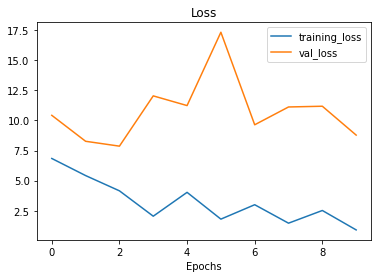

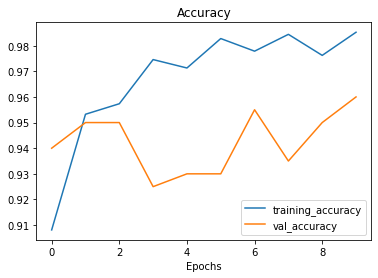

In [ ]:
plot_history(history_vgg)

In [ ]:
# Evaluating the model on the test set
test_model = keras.models.load_model('vgg_feature_extraction.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

7/7 [==============================] - 2s 151ms/step - loss: 1.4775 - accuracy: 0.9750
Test accuracy: 0.975


### Fine-tuning

In [ ]:
# Fine-tuning the model
model_vgg.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(learning_rate=1e-5),
                  metrics=['accuracy'])

In [ ]:
callbacks=[
    keras.callbacks.ModelCheckpoint(
        filepath='vgg_fine_tuning.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

history_vgg_fine_tuning = model_vgg.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/10
39/39 [==============================] - 11s 237ms/step - loss: 2.3301 - accuracy: 0.9803 - val_loss: 8.7101 - val_accuracy: 0.9650
Epoch 2/10
39/39 [==============================] - 10s 234ms/step - loss: 1.0501 - accuracy: 0.9877 - val_loss: 8.7121 - val_accuracy: 0.9550
Epoch 3/10
39/39 [==============================] - 10s 235ms/step - loss: 1.7670 - accuracy: 0.9844 - val_loss: 8.7449 - val_accuracy: 0.9550
Epoch 4/10
39/39 [==============================] - 12s 263ms/step - loss: 1.7732 - accuracy: 0.9828 - val_loss: 8.7492 - val_accuracy: 0.9550
Epoch 5/10
39/39 [==============================] - 11s 248ms/step - loss: 1.0104 - accuracy: 0.9885 - val_loss: 8.6892 - val_accuracy: 0.9550
Epoch 6/10
39/39 [==============================] - 12s 276ms/step - loss: 0.6394 - accuracy: 0.9885 - val_loss: 8.5783 - val_accuracy: 0.9650
Epoch 7/10
39/39 [==============================] - 12s 258ms/step - loss: 1.4620 - accuracy: 0.9902 - val_loss: 8.5627 - val_accuracy: 0.9650

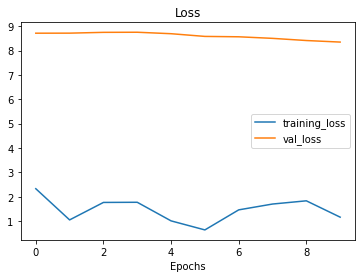

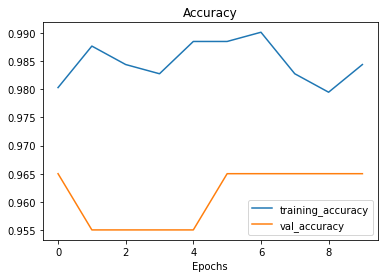

In [ ]:
plot_history(history_vgg_fine_tuning)

In [ ]:
# Evaluating the model on the test set
test_model = keras.models.load_model('vgg_fine_tuning.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

7/7 [==============================] - 3s 160ms/step - loss: 1.5487 - accuracy: 0.9850
Test accuracy: 0.985


## Resnet50V2

### Feature extraction

In [ ]:
from tensorflow.keras.applications import ResNet50
resnet = ResNet50(include_top = False, weights= 'imagenet', input_shape=(224,224,3))

94781440/94765736 [==============================] - 9s 0us/step


In [ ]:
# resnet.summary()

In [ ]:
resnet.trainable = False

In [ ]:
# Build the model
inputs = keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.resnet50.preprocess_input(inputs)
x = resnet(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model_resnet = keras.Model(inputs, outputs)

In [ ]:
model_resnet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_1   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                           

In [ ]:
model_resnet.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="resnet_feature_extraction.keras",
        save_best_only=True,
        monitor="val_accuracy")
]

history_resnet = model_resnet.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
    callbacks=callbacks) 

Epoch 1/10
39/39 [==============================] - 13s 226ms/step - loss: 0.2630 - accuracy: 0.8934 - val_loss: 0.1779 - val_accuracy: 0.9300
Epoch 2/10
39/39 [==============================] - 9s 217ms/step - loss: 0.0885 - accuracy: 0.9754 - val_loss: 0.1325 - val_accuracy: 0.9500
Epoch 3/10
39/39 [==============================] - 8s 187ms/step - loss: 0.0625 - accuracy: 0.9861 - val_loss: 0.1100 - val_accuracy: 0.9550
Epoch 4/10
39/39 [==============================] - 8s 174ms/step - loss: 0.0513 - accuracy: 0.9869 - val_loss: 0.0998 - val_accuracy: 0.9500
Epoch 5/10
39/39 [==============================] - 8s 174ms/step - loss: 0.0410 - accuracy: 0.9926 - val_loss: 0.0927 - val_accuracy: 0.9550
Epoch 6/10
39/39 [==============================] - 8s 185ms/step - loss: 0.0341 - accuracy: 0.9951 - val_loss: 0.0870 - val_accuracy: 0.9600
Epoch 7/10
39/39 [==============================] - 8s 173ms/step - loss: 0.0294 - accuracy: 0.9943 - val_loss: 0.0851 - val_accuracy: 0.9550
Epoch

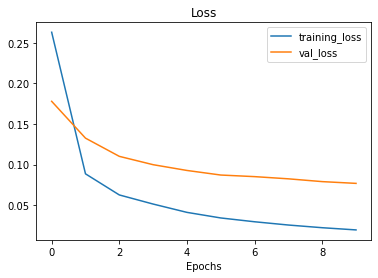

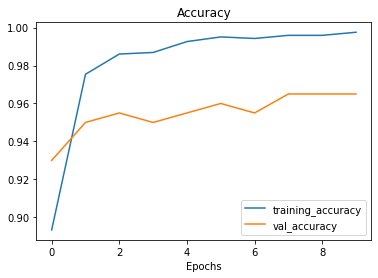

In [ ]:
plot_history(history_resnet)

In [ ]:
# Evaluating the model on the test set
test_model = keras.models.load_model('resnet_feature_extraction.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

7/7 [==============================] - 3s 93ms/step - loss: 0.0501 - accuracy: 0.9900
Test accuracy: 0.990


### Fine-tuning

In [ ]:
resnet.trainable = True
for layer in resnet.layers[:-4]:
    layer.trainable = False

In [ ]:
model_resnet.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="resnet_fine_tuning.keras",
        save_best_only=True,
        monitor="val_accuracy")
]

history_resnet_fine_tuning = model_resnet.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
    callbacks=callbacks)

Epoch 1/10
39/39 [==============================] - 13s 210ms/step - loss: 0.0180 - accuracy: 0.9975 - val_loss: 0.0779 - val_accuracy: 0.9650
Epoch 2/10
39/39 [==============================] - 8s 176ms/step - loss: 0.0160 - accuracy: 0.9984 - val_loss: 0.0796 - val_accuracy: 0.9650
Epoch 3/10
39/39 [==============================] - 8s 175ms/step - loss: 0.0153 - accuracy: 0.9984 - val_loss: 0.0772 - val_accuracy: 0.9650
Epoch 4/10
39/39 [==============================] - 8s 175ms/step - loss: 0.0135 - accuracy: 0.9992 - val_loss: 0.0786 - val_accuracy: 0.9650
Epoch 5/10
39/39 [==============================] - 8s 176ms/step - loss: 0.0126 - accuracy: 0.9992 - val_loss: 0.0782 - val_accuracy: 0.9650
Epoch 6/10
39/39 [==============================] - 8s 177ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0782 - val_accuracy: 0.9650
Epoch 7/10
39/39 [==============================] - 8s 176ms/step - loss: 0.0111 - accuracy: 0.9992 - val_loss: 0.0766 - val_accuracy: 0.9650
Epoch

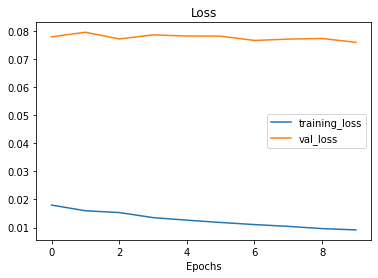

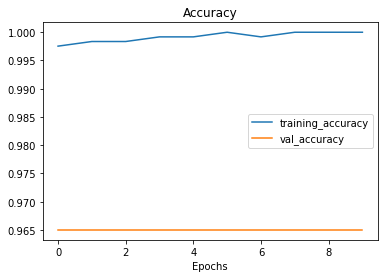

In [ ]:
plot_history(history_resnet_fine_tuning)

In [ ]:
# Evaluating the model on the test set
test_model = keras.models.load_model('resnet_fine_tuning.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

7/7 [==============================] - 2s 91ms/step - loss: 0.0453 - accuracy: 0.9900
Test accuracy: 0.990


## EfficientNetB0

### Feature extraction

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)])

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_en_aug = tf.keras.Model(inputs, outputs)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
for layer in model_en_aug.layers:
    print(layer)
    print(layer.trainable)

True
False
True
True


In [ ]:
model_en_aug.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 1,281
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# compile the model
model_en_aug.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

# define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='en_aug_feature_extraction.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

# fit the model
history_en_aug = model_en_aug.fit(train_dataset,
                          epochs=10,
                          validation_data=val_dataset,
                          callbacks=callbacks)

Epoch 1/10
39/39 [==============================] - 17s 254ms/step - loss: 0.4245 - accuracy: 0.8753 - val_loss: 0.3208 - val_accuracy: 0.9100
Epoch 2/10
39/39 [==============================] - 8s 172ms/step - loss: 0.2103 - accuracy: 0.9590 - val_loss: 0.2326 - val_accuracy: 0.9200
Epoch 3/10
39/39 [==============================] - 9s 207ms/step - loss: 0.1499 - accuracy: 0.9713 - val_loss: 0.1904 - val_accuracy: 0.9350
Epoch 4/10
39/39 [==============================] - 8s 167ms/step - loss: 0.1197 - accuracy: 0.9820 - val_loss: 0.1639 - val_accuracy: 0.9450
Epoch 5/10
39/39 [==============================] - 8s 168ms/step - loss: 0.1009 - accuracy: 0.9861 - val_loss: 0.1479 - val_accuracy: 0.9500
Epoch 6/10
39/39 [==============================] - 8s 167ms/step - loss: 0.0888 - accuracy: 0.9869 - val_loss: 0.1362 - val_accuracy: 0.9600
Epoch 7/10
39/39 [==============================] - 7s 164ms/step - loss: 0.0783 - accuracy: 0.9885 - val_loss: 0.1283 - val_accuracy: 0.9500
Epoch

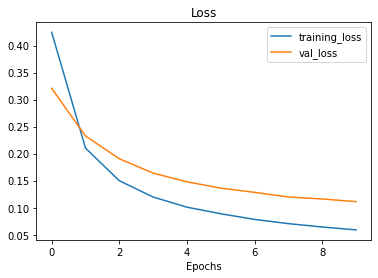

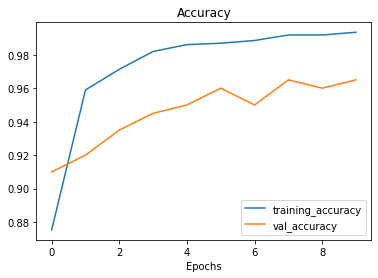

In [ ]:
plot_history(history_en_aug)

In [ ]:
test_en_model = keras.models.load_model('en_aug_feature_extraction.keras')
loss, acc = test_en_model.evaluate(test_dataset)
print(f'Test accuracy: {acc:.3f}')

7/7 [==============================] - 3s 71ms/step - loss: 0.0654 - accuracy: 0.9750
Test accuracy: 0.975


### Fine-tuning

In [ ]:
base_model.trainable = True

# Freeze all layers except for the 
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
# compile the model
model_en_aug.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                 metrics=['accuracy'])

# define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='en_aug_fine_tuning.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

# fit the model
history_en_aug_fine_tuning = model_en_aug.fit(train_dataset,
                          epochs=10,
                          validation_data=val_dataset,
                          callbacks=callbacks)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


39/39 [==============================] - 15s 207ms/step - loss: 0.0396 - accuracy: 0.9893 - val_loss: 0.1067 - val_accuracy: 0.9650
Epoch 2/10
39/39 [==============================] - 8s 170ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.1029 - val_accuracy: 0.9650
Epoch 3/10
39/39 [==============================] - 7s 159ms/step - loss: 0.0099 - accuracy: 0.9984 - val_loss: 0.1139 - val_accuracy: 0.9650
Epoch 4/10
39/39 [==============================] - 7s 160ms/step - loss: 0.0098 - accuracy: 0.9984 - val_loss: 0.1068 - val_accuracy: 0.9700
Epoch 5/10
39/39 [==============================] - 7s 167ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1029 - val_accuracy: 0.9600
Epoch 6/10
39/39 [==============================] - 8s 169ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1017 - val_accuracy: 0.9600
Epoch 7/10
39/39 [==============================] - 8s 169ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0978 - val_accuracy: 0.9650
Epoch 8/10
39/39

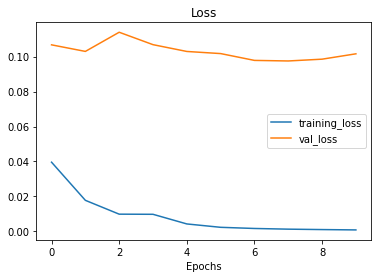

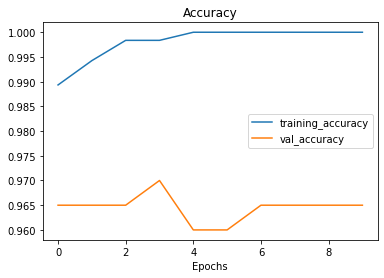

In [ ]:
plot_history(history_en_aug_fine_tuning)

In [ ]:
test_en_model = keras.models.load_model('en_aug_fine_tuning.keras')
loss, acc = test_en_model.evaluate(test_dataset)
print(f'Test accuracy: {acc:.3f}')

7/7 [==============================] - 3s 69ms/step - loss: 0.0230 - accuracy: 0.9900
Test accuracy: 0.990


## EfficientNetB1


### Feature extraction

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_en1 = tf.keras.Model(inputs, outputs)

In [ ]:
model_en1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb1 (Functional)  (None, None, None, 1280)  6575239  
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 6,576,520
Trainable params: 1,281
Non-trainable params: 6,575,239
_________________________________________________________________


In [ ]:
# compile the model
model_en1.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

# define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='en1_feature_extraction.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

# Setup EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  patience=5)


# fit the model
history_en1 = model_en1.fit(train_dataset,
                          epochs=30,
                          validation_data=val_dataset,
                          callbacks=[callbacks, early_stopping])

Epoch 1/30
39/39 [==============================] - 17s 230ms/step - loss: 0.4895 - accuracy: 0.8072 - val_loss: 0.3234 - val_accuracy: 0.9350
Epoch 2/30
39/39 [==============================] - 8s 180ms/step - loss: 0.2240 - accuracy: 0.9762 - val_loss: 0.2219 - val_accuracy: 0.9450
Epoch 3/30
39/39 [==============================] - 8s 181ms/step - loss: 0.1529 - accuracy: 0.9844 - val_loss: 0.1765 - val_accuracy: 0.9650
Epoch 4/30
39/39 [==============================] - 9s 197ms/step - loss: 0.1216 - accuracy: 0.9861 - val_loss: 0.1582 - val_accuracy: 0.9500
Epoch 5/30
39/39 [==============================] - 8s 182ms/step - loss: 0.0990 - accuracy: 0.9869 - val_loss: 0.1392 - val_accuracy: 0.9550
Epoch 6/30
39/39 [==============================] - 8s 181ms/step - loss: 0.0851 - accuracy: 0.9861 - val_loss: 0.1257 - val_accuracy: 0.9600
Epoch 7/30
39/39 [==============================] - 8s 180ms/step - loss: 0.0750 - accuracy: 0.9877 - val_loss: 0.1168 - val_accuracy: 0.9700
Epoch

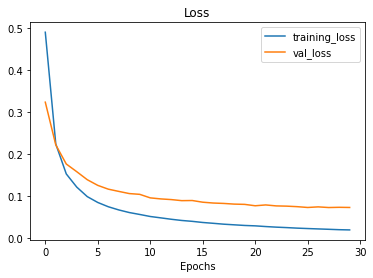

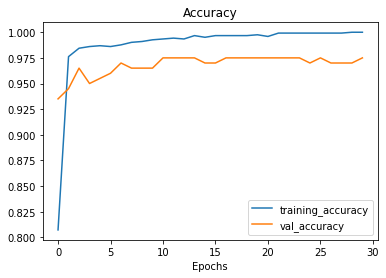

In [ ]:
plot_history(history_en1)

In [ ]:
test_en_model = keras.models.load_model('en1_feature_extraction.keras')
loss, acc = test_en_model.evaluate(test_dataset)
print(f'Test accuracy: {acc:.3f}')

7/7 [==============================] - 3s 86ms/step - loss: 0.0398 - accuracy: 0.9900
Test accuracy: 0.990


### Fine-tuning

In [ ]:
base_model.trainable = True

# Freeze all layers except for the 
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
# compile the model
model_en1.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                 metrics=['accuracy'])

# define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='en1_fine_tuning.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

# fit the model
history_en1_fine_tuning = model_en1.fit(train_dataset,
                          epochs=30,
                          validation_data=val_dataset,
                          callbacks=[callbacks, early_stopping])

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


39/39 [==============================] - 17s 240ms/step - loss: 0.0217 - accuracy: 0.9959 - val_loss: 0.0776 - val_accuracy: 0.9700
Epoch 2/30
39/39 [==============================] - 9s 215ms/step - loss: 0.0097 - accuracy: 0.9975 - val_loss: 0.0659 - val_accuracy: 0.9650
Epoch 3/30
39/39 [==============================] - 9s 184ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 0.9650
Epoch 4/30
39/39 [==============================] - 9s 205ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0725 - val_accuracy: 0.9750
Epoch 5/30
39/39 [==============================] - 8s 173ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0841 - val_accuracy: 0.9650
Epoch 6/30
39/39 [==============================] - 8s 176ms/step - loss: 8.6676e-04 - accuracy: 1.0000 - val_loss: 0.0806 - val_accuracy: 0.9650
Epoch 7/30
39/39 [==============================] - 8s 173ms/step - loss: 5.0700e-04 - accuracy: 1.0000 - val_loss: 0.0812 - val_accuracy: 0.9650


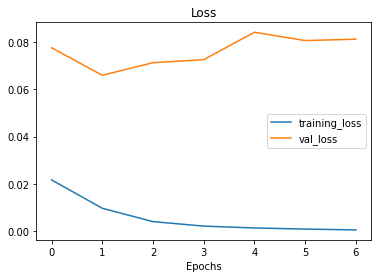

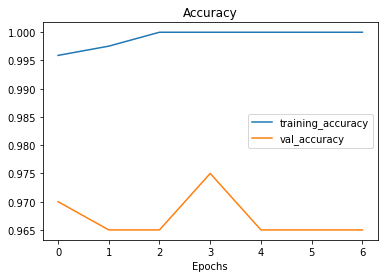

In [ ]:
plot_history(history_en1_fine_tuning)

In [ ]:
test_en_model = keras.models.load_model('en1_fine_tuning.keras')
loss, acc = test_en_model.evaluate(test_dataset)
print(f'Test accuracy: {acc:.3f}')

7/7 [==============================] - 3s 88ms/step - loss: 0.0275 - accuracy: 0.9900
Test accuracy: 0.990


## EfficientNetB2


### Feature extraction

In [ ]:
base_model = tf.keras.applications.EfficientNetB2(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_en2 = tf.keras.Model(inputs, outputs)

In [ ]:
model_en2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb2 (Functional)  (None, None, None, 1408)  7768569  
                                                                 
 global_average_pooling2d_4   (None, 1408)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 1)                 1409      
                                                                 
Total params: 7,769,978
Trainable params: 1,409
Non-trainable params: 7,768,569
_________________________________________________________________


In [ ]:
# compile the model
model_en2.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

# define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='en2_feature_extraction.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

# fit the model
history_en2 = model_en2.fit(train_dataset,
                          epochs=30,
                          validation_data=val_dataset,
                          callbacks=[callbacks, early_stopping])

Epoch 1/30
39/39 [==============================] - 23s 254ms/step - loss: 0.4779 - accuracy: 0.8203 - val_loss: 0.3581 - val_accuracy: 0.9150
Epoch 2/30
39/39 [==============================] - 9s 197ms/step - loss: 0.2551 - accuracy: 0.9409 - val_loss: 0.2467 - val_accuracy: 0.9500
Epoch 3/30
39/39 [==============================] - 10s 217ms/step - loss: 0.1813 - accuracy: 0.9655 - val_loss: 0.1931 - val_accuracy: 0.9600
Epoch 4/30
39/39 [==============================] - 8s 186ms/step - loss: 0.1443 - accuracy: 0.9746 - val_loss: 0.1671 - val_accuracy: 0.9600
Epoch 5/30
39/39 [==============================] - 8s 190ms/step - loss: 0.1189 - accuracy: 0.9770 - val_loss: 0.1460 - val_accuracy: 0.9600
Epoch 6/30
39/39 [==============================] - 10s 226ms/step - loss: 0.1045 - accuracy: 0.9836 - val_loss: 0.1336 - val_accuracy: 0.9600
Epoch 7/30
39/39 [==============================] - 12s 277ms/step - loss: 0.0913 - accuracy: 0.9844 - val_loss: 0.1253 - val_accuracy: 0.9600
Ep

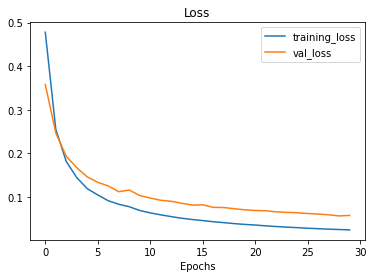

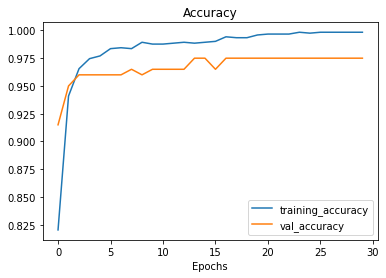

In [ ]:
plot_history(history_en2)

In [ ]:
test_en_model = keras.models.load_model('en2_feature_extraction.keras')
loss, acc = test_en_model.evaluate(test_dataset)
print(f'Test accuracy: {acc:.3f}')

7/7 [==============================] - 3s 90ms/step - loss: 0.0526 - accuracy: 0.9900
Test accuracy: 0.990


### Fine-tuning

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


39/39 [==============================] - 17s 237ms/step - loss: 0.0191 - accuracy: 0.9951 - val_loss: 0.0453 - val_accuracy: 0.9850
Epoch 2/20
39/39 [==============================] - 8s 188ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.0254 - val_accuracy: 0.9950
Epoch 3/20
39/39 [==============================] - 8s 176ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0276 - val_accuracy: 0.9950
Epoch 4/20
39/39 [==============================] - 8s 174ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.9950
Epoch 5/20
39/39 [==============================] - 8s 175ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0382 - val_accuracy: 0.9950
Epoch 6/20
39/39 [==============================] - 8s 175ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 0.9950
Epoch 7/20
39/39 [==============================] - 8s 175ms/step - loss: 7.2257e-04 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 0.9950
Epoch 8/20
3

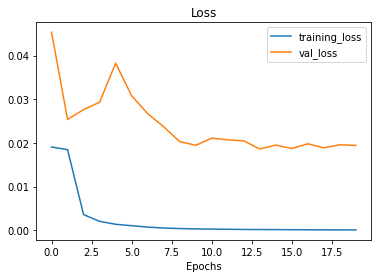

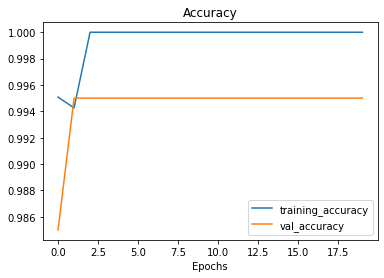

In [ ]:
base_model.trainable = True

# Freeze all layers except for the 
for layer in base_model.layers[:-10]:
  layer.trainable = False

# compile the model
model_en2.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                 metrics=['accuracy'])

# define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='en2_fine_tuning.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

# fit the model
history_en2_fine_tuning = model_en2.fit(train_dataset,
                          epochs=20,
                          validation_data=val_dataset,
                          callbacks=[callbacks])

# plot
plot_history(history_en2_fine_tuning)

# Evaluate on the test set
test_en_model = keras.models.load_model('en2_fine_tuning.keras')
loss, acc = test_en_model.evaluate(test_dataset)
print(f'Test accuracy: {acc:.3f}')

### Unfreeze more layers

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


39/39 [==============================] - 17s 240ms/step - loss: 0.2902 - accuracy: 0.9089 - val_loss: 0.0985 - val_accuracy: 0.9700
Epoch 2/50
39/39 [==============================] - 9s 193ms/step - loss: 0.0521 - accuracy: 0.9844 - val_loss: 0.0765 - val_accuracy: 0.9600
Epoch 3/50
39/39 [==============================] - 9s 195ms/step - loss: 0.0281 - accuracy: 0.9943 - val_loss: 0.0483 - val_accuracy: 0.9800
Epoch 4/50
39/39 [==============================] - 9s 195ms/step - loss: 0.0234 - accuracy: 0.9934 - val_loss: 0.0433 - val_accuracy: 0.9850
Epoch 5/50
39/39 [==============================] - 9s 213ms/step - loss: 0.0167 - accuracy: 0.9967 - val_loss: 0.0440 - val_accuracy: 0.9850
Epoch 6/50
39/39 [==============================] - 9s 193ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0370 - val_accuracy: 0.9850
Epoch 7/50
39/39 [==============================] - 9s 193ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0335 - val_accuracy: 0.9850
Epoch 8/50
39/39

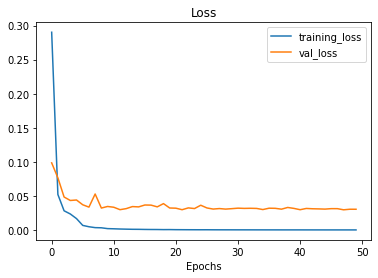

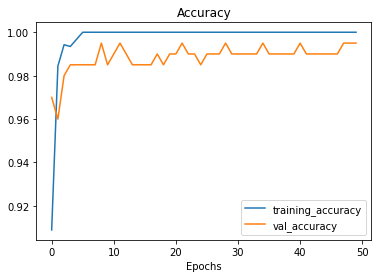

In [ ]:
base_model.trainable = True

# Freeze all layers except for the 
for layer in base_model.layers[:-15]:
  layer.trainable = False

# compile the model
model_en2.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                 metrics=['accuracy'])

# define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='en2_fine_tuning_more_layers.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

# fit the model
history_en2_fine_tuning_more_layers = model_en2.fit(train_dataset,
                          epochs=50,
                          validation_data=val_dataset,
                          callbacks=[callbacks])

# plot
plot_history(history_en2_fine_tuning_more_layers)

# Evaluate on the test set
test_en_model = keras.models.load_model('en2_fine_tuning_more_layers.keras')
loss, acc = test_en_model.evaluate(test_dataset)
print(f'Test accuracy: {acc:.3f}')

## EfficientNetB3

### Feature extraction

43950080/43941136 [==============================] - 1s 0us/step
Epoch 1/30
39/39 [==============================] - 21s 305ms/step - loss: 0.4299 - accuracy: 0.8663 - val_loss: 0.3350 - val_accuracy: 0.8950
Epoch 2/30
39/39 [==============================] - 9s 208ms/step - loss: 0.2233 - accuracy: 0.9590 - val_loss: 0.2482 - val_accuracy: 0.9400
Epoch 3/30
39/39 [==============================] - 9s 203ms/step - loss: 0.1631 - accuracy: 0.9647 - val_loss: 0.2033 - val_accuracy: 0.9450
Epoch 4/30
39/39 [==============================] - 9s 201ms/step - loss: 0.1316 - accuracy: 0.9721 - val_loss: 0.1758 - val_accuracy: 0.9500
Epoch 5/30
39/39 [==============================] - 9s 202ms/step - loss: 0.1106 - accuracy: 0.9754 - val_loss: 0.1578 - val_accuracy: 0.9550
Epoch 6/30
39/39 [==============================] - 9s 202ms/step - loss: 0.0965 - accuracy: 0.9787 - val_loss: 0.1425 - val_accuracy: 0.9700
Epoch 7/30
39/39 [==============================] - 11s 257ms/step - loss: 0.0859 

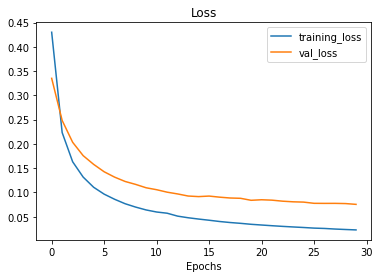

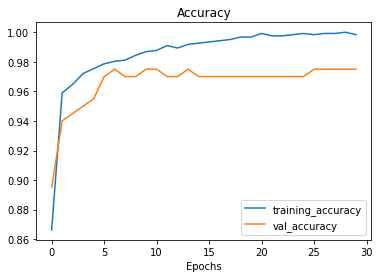

In [ ]:
base_model = tf.keras.applications.EfficientNetB3(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_en3 = tf.keras.Model(inputs, outputs)

# compile the model
model_en3.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

# define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='en3_feature_extraction.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

# fit the model
history_en3 = model_en3.fit(train_dataset,
                          epochs=30,
                          validation_data=val_dataset,
                          callbacks=[callbacks, early_stopping])

# plot
plot_history(history_en3)

# Evaluate
test_en_model = keras.models.load_model('en3_feature_extraction.keras')
loss, acc = test_en_model.evaluate(test_dataset)
print(f'Test accuracy: {acc:.3f}')

### Fine-tuning

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


39/39 [==============================] - 20s 262ms/step - loss: 0.0179 - accuracy: 0.9967 - val_loss: 0.0564 - val_accuracy: 0.9800
Epoch 2/20
39/39 [==============================] - 9s 204ms/step - loss: 0.0093 - accuracy: 0.9975 - val_loss: 0.0507 - val_accuracy: 0.9800
Epoch 3/20
39/39 [==============================] - 8s 190ms/step - loss: 0.0099 - accuracy: 0.9975 - val_loss: 0.0632 - val_accuracy: 0.9800
Epoch 4/20
39/39 [==============================] - 8s 190ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0667 - val_accuracy: 0.9800
Epoch 5/20
39/39 [==============================] - 8s 189ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 0.9800
Epoch 6/20
39/39 [==============================] - 8s 191ms/step - loss: 7.8148e-04 - accuracy: 1.0000 - val_loss: 0.0655 - val_accuracy: 0.9800
Epoch 7/20
39/39 [==============================] - 8s 191ms/step - loss: 6.2308e-04 - accuracy: 1.0000 - val_loss: 0.0660 - val_accuracy: 0.9800
Epoch 8/

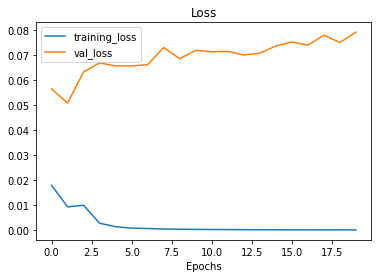

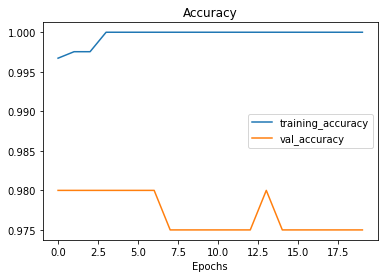

In [ ]:
base_model.trainable = True

# Freeze all layers except for the 
for layer in base_model.layers[:-10]:
  layer.trainable = False

# compile the model
model_en3.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                 metrics=['accuracy'])

# define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='en3_fine_tuning.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

# fit the model
history_en3_fine_tuning = model_en3.fit(train_dataset,
                          epochs=20,
                          validation_data=val_dataset,
                          callbacks=[callbacks])

# plot
plot_history(history_en3_fine_tuning)

# Evaluate on the test set
test_en_model = keras.models.load_model('en3_fine_tuning.keras')
loss, acc = test_en_model.evaluate(test_dataset)
print(f'Test accuracy: {acc:.3f}')

### Fine-tuning more layers

In [ ]:
base_model.trainable = True

# Freeze all layers except for the 
for layer in base_model.layers[:-15]:
  layer.trainable = False

# compile the model
model_en3.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                 metrics=['accuracy'])

# define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='en3_fine_tuning_more_layers.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

# fit the model
history_en3_fine_tuning_more_layers = model_en3.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=[callbacks],
                                                    verbose=2)

# plot
plot_history(history_en3_fine_tuning_more_layers)

# Evaluate on the test set
test_en_model = keras.models.load_model('en3_fine_tuning_more_layers.keras')
loss, acc = test_en_model.evaluate(test_dataset)
print(f'Test accuracy: {acc:.3f}')

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


39/39 - 19s - loss: 7.7909e-04 - accuracy: 1.0000 - val_loss: 0.1720 - val_accuracy: 0.9650 - 19s/epoch - 484ms/step
Epoch 2/50
39/39 - 9s - loss: 0.0034 - accuracy: 0.9984 - val_loss: 0.0731 - val_accuracy: 0.9750 - 9s/epoch - 231ms/step
Epoch 3/50
39/39 - 8s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.1215 - val_accuracy: 0.9750 - 8s/epoch - 216ms/step
Epoch 4/50
39/39 - 8s - loss: 2.6722e-04 - accuracy: 1.0000 - val_loss: 0.1466 - val_accuracy: 0.9700 - 8s/epoch - 217ms/step
Epoch 5/50
39/39 - 8s - loss: 9.5875e-05 - accuracy: 1.0000 - val_loss: 0.1234 - val_accuracy: 0.9700 - 8s/epoch - 216ms/step
Epoch 6/50
39/39 - 8s - loss: 6.4737e-05 - accuracy: 1.0000 - val_loss: 0.1214 - val_accuracy: 0.9700 - 8s/epoch - 215ms/step
Epoch 7/50
39/39 - 9s - loss: 5.6776e-05 - accuracy: 1.0000 - val_loss: 0.1216 - val_accuracy: 0.9700 - 9s/epoch - 242ms/step
Epoch 8/50
39/39 - 8s - loss: 5.0662e-05 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9700 - 8s/epoch - 215ms/step
Epoch 9/5

## EfficientNetB4

### Feature extraction

Epoch 1/40
39/39 [==============================] - 24s 315ms/step - loss: 0.4596 - accuracy: 0.8310 - val_loss: 0.4186 - val_accuracy: 0.8400
Epoch 2/40
39/39 [==============================] - 10s 225ms/step - loss: 0.3003 - accuracy: 0.9130 - val_loss: 0.3451 - val_accuracy: 0.8850
Epoch 3/40
39/39 [==============================] - 10s 224ms/step - loss: 0.2389 - accuracy: 0.9327 - val_loss: 0.3007 - val_accuracy: 0.9050
Epoch 4/40
39/39 [==============================] - 10s 225ms/step - loss: 0.2030 - accuracy: 0.9467 - val_loss: 0.2685 - val_accuracy: 0.9100
Epoch 5/40
39/39 [==============================] - 10s 240ms/step - loss: 0.1784 - accuracy: 0.9516 - val_loss: 0.2439 - val_accuracy: 0.9250
Epoch 6/40
39/39 [==============================] - 10s 226ms/step - loss: 0.1612 - accuracy: 0.9573 - val_loss: 0.2298 - val_accuracy: 0.9150
Epoch 7/40
39/39 [==============================] - 10s 227ms/step - loss: 0.1456 - accuracy: 0.9606 - val_loss: 0.2132 - val_accuracy: 0.9250

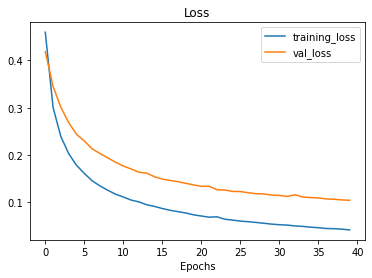

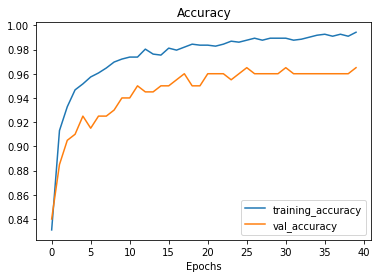

In [ ]:
base_model = tf.keras.applications.EfficientNetB4(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_en4 = tf.keras.Model(inputs, outputs)

# compile the model
model_en4.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

# define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='en4_feature_extraction.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]

# fit the model
history_en4 = model_en4.fit(train_dataset,
                          epochs=40,
                          validation_data=val_dataset,
                          callbacks=[callbacks, early_stopping])

# plot
plot_history(history_en4)

# Evaluate
test_en_model = keras.models.load_model('en4_feature_extraction.keras')
loss, acc = test_en_model.evaluate(test_dataset)
print(f'Test accuracy: {acc:.3f}')

## Submit

In [ ]:
# Submit with EfficientNetB1 feature extraction version
submit_dir = new_base_dir/'submit'/'test'
os.makedirs(submit_dir)

In [ ]:
for i in test_data_list:
    shutil.copyfile(src=original_dir / i,
                    dst=submit_dir / i )

In [ ]:
submit_dataset = image_dataset_from_directory(
    new_base_dir/'submit',
    shuffle=False,
    image_size=(224, 224),
    batch_size=32)

Found 1080 files belonging to 1 classes.


In [ ]:
best_model = keras.models.load_model('en2_fine_tuning.keras')
pred_probs = best_model.predict(submit_dataset)

In [ ]:
pred_probs[:5]

array([[9.4882288e-04],
       [6.4329493e-11],
       [1.0000000e+00],
       [2.5655186e-07],
       [1.1049058e-04]], dtype=float32)

In [ ]:
pred_labels = tf.where(pred_probs < 0.5, 0, 1)
pred_labels[:5]

<tf.Tensor: shape=(5, 1), dtype=int32, numpy=
array([[0],
       [0],
       [1],
       [0],
       [0]], dtype=int32)>

In [ ]:
pred_labels.numpy()

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [ ]:
df_test

,Image_id,pred
0,id_00exusbkgzw1b.jpg,0
1,id_03dqinf6w0znv.jpg,0
2,id_046yl0cxn3ybz.jpg,1
3,id_04athdtx2abyg.jpg,0
4,id_062aauf9e9jk0.jpg,0
...,...,...
1075,id_zv5fvjnakvf1r.jpg,1
1076,id_zvpikh1z30arn.jpg,0
1077,id_zypilwkudljyz.jpg,0
1078,id_zz9lwehh5sxdp.jpg,1


In [ ]:
df_test['pred'] = pred_labels.numpy()

In [ ]:
df_test.head()

,Image_id,pred
0,id_00exusbkgzw1b.jpg,0
1,id_03dqinf6w0znv.jpg,0
2,id_046yl0cxn3ybz.jpg,1
3,id_04athdtx2abyg.jpg,0
4,id_062aauf9e9jk0.jpg,0


In [ ]:
df_test.to_csv('final.csv', index=False)